In [73]:
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as img

In [74]:
with MPRester("TnDJGCQnzv8uX3Ao") as m:

    # Structure for material id
    structure = m.get_bandstructure_by_material_id("mp-985829")

# Structure de bande électronique du HfS2 :

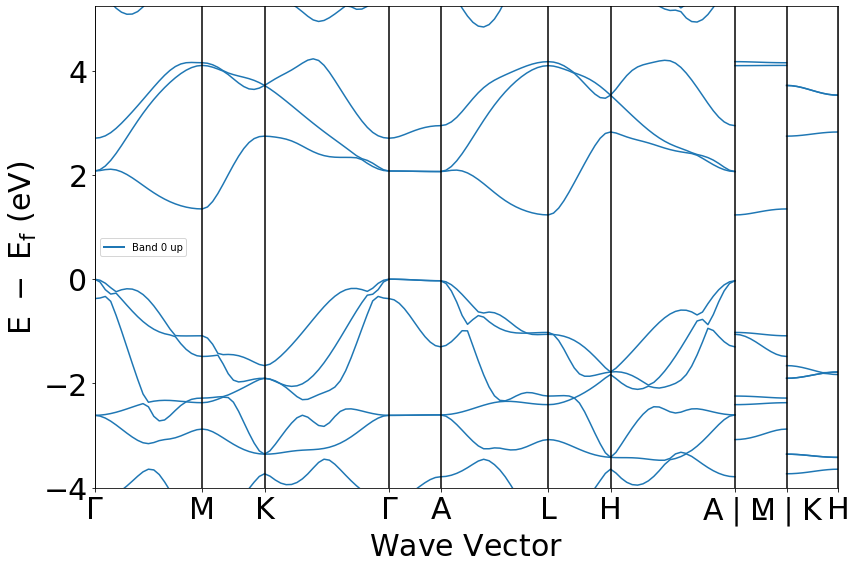

In [75]:
bsplotter = BSPlotter(structure)
bsplotter.show()

## Détermination de la bande interdite

In [76]:
print(structure.get_band_gap())

{'direct': False, 'energy': 1.2325, 'transition': '\\Gamma-L'}


La bande interdite est indirecte (comme observable sur le graphique et confirmé par le print) et a une énergie de 1.2325 eV. Le fait que la bande soit indirecte signifie qu'il doit y avoir une interaction à la fois avec un photon et avec un phonon afin de modifier leur vecteur d'onde, ce qui rend la transition bien moins probable qu'un matériau à bande directe. Le paramètre "transition" nous renseigne sur le chemin le long duquel le gap est le plus étroit. Le sommet de la bande de valence se trouve en Gamma et la base de la bande de conduction en L.

## Directions de la dernière bande de valence et de la première bande de conduction qui présentent le plus et le moins de dispersion

In [77]:
dt = bsplotter.bs_plot_data()
pos = dt.get('distances')
ener = dt.get('energy')
dist = dt.get('ticks').get('distance')
Dist = np.array([dist[0], dist[1], dist[3], dist[5], dist[7], dist[9], dist[11], dist[13], dist[14], dist[15]])

In [78]:
# Distance entre chaque branche :
d = Dist[1:] - Dist[0:-1]

#Détermination de la dernière bande de valence et des pentes entre chaque branche :
vbm = structure.get_vbm()
print("Index vbm :" , vbm['band_index'])
mV = np.zeros(np.shape(d))
for i in range(np.size(d)):
    mV[i] = ((ener.get('1')[i][10][-1]) - (ener.get('1')[i][10][0]))/d[i]

# Détermination de la première bande de conduction et des pentes entre chaque branche :
cbm = structure.get_cbm()
print("Index cbm :" , cbm['band_index'])
mC = np.zeros(np.shape(d))
for i in range(np.size(d)):
    mC[i] = ((ener.get('1')[i][11][-1]) - (ener.get('1')[i][11][0]))/d[i]

Index vbm : defaultdict(<class 'list'>, {<Spin.up: 1>: [9, 10]})
Index cbm : defaultdict(<class 'list'>, {<Spin.up: 1>: [11]})


In [79]:
maxV = np.max(abs(mV))
maxC = np.max(abs(mC))
minC = np.min(abs(mC))
minV = np.min(abs(mV))

In [80]:
print("Dernière bande de valence :\n")
print("- Direction qui présente le plus de dispertion : H - A ","(maxV=",maxV,")")
print("- Direction qui présente le moins de dispertion : Γ - A ","(minV=",minV,")\n")
print("Première bande de conduction :\n")
print("- Direction qui présente le plus de dispertion : L - H ","(maxC=",maxC,")")
print("- Direction qui présente le moins de dispertion : Γ - A ","(minC=",minC,")\n")

Dernière bande de valence :

- Direction qui présente le plus de dispertion : H - A  (maxV= 1.5222187287099243 )
- Direction qui présente le moins de dispertion : Γ - A  (minV= 0.06350571171982809 )

Première bande de conduction :

- Direction qui présente le plus de dispertion : L - H  (maxC= 2.7676700794758093 )
- Direction qui présente le moins de dispertion : Γ - A  (minC= 0.020958980765619084 )



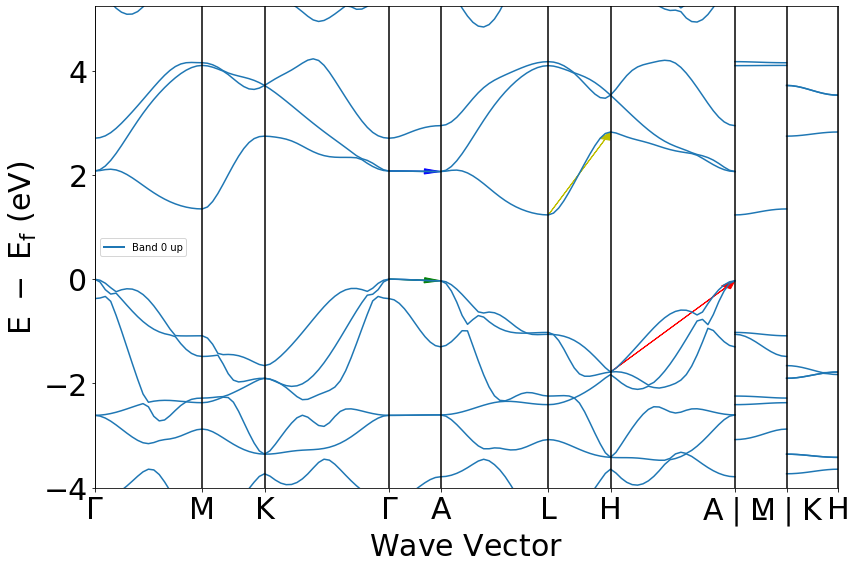

In [81]:
bsplotter.get_plot()
plt.arrow(Dist[6], (ener.get('1')[6][10])[0], d[6], mV[6]*d[6], color = 'r', head_width = 0.1,length_includes_head=True)
plt.arrow(Dist[3], (ener.get('1')[3][10])[0], d[3], mV[3]*d[3], color = 'g', head_width = 0.1,length_includes_head=True)
plt.arrow(Dist[5], (ener.get('1')[5][11])[0], d[5], mC[5]*d[5], color = 'y', head_width = 0.1,length_includes_head=True)
plt.arrow(Dist[3], (ener.get('1')[3][11])[0], d[3], mC[3]*d[3], color = 'b', head_width = 0.1,length_includes_head=True)

plt.show()

## Masse effective au sommet de la dernière bande de valence et à la base de la première bande de conduction

La formule pour calculer la masse effective m* est donnée par :

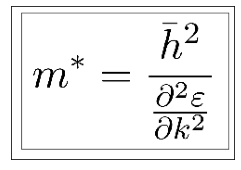

In [82]:
image_1=img.imread('Masse_effective.png')
fig, axes = plt.subplots(figsize=(4,4))
axes.get_xaxis().set_visible(False)
axes.get_yaxis().set_visible(False)
axes.imshow(image_1)
plt.show()

où h_barre = 1.054571817E-34 J.s est la constante de Planck réduite et le terme au dénominateur est la dérivée seconde de l'énergie de la bande électronique par rapport au vecteur d'onde k.

Afin de calculer cette dérivée seconde, on considère une dispersion parabolique. Cette approximation parabolique est calculée à l'aide du maximum de valence (minimum de conduction) et un autre point appartenant à la bande électronique.

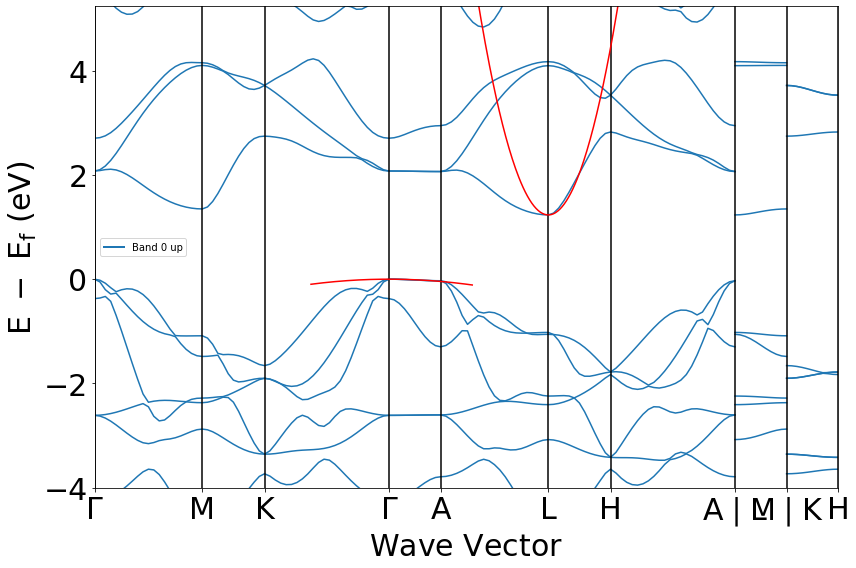

In [83]:
hb = 1.054571817*(10**-34)
eV = 1.602176634*(10**-19)

#Coordonnées du sommet de la bande de valence
[x1,y1] = [pos[3][0],ener.get('1')[3][10][0]]
#Coordonnées d'un autre point
[x2,y2] = [pos[3][8],ener.get('1')[3][10][8]]

#Coordonnées du bas de la bande de conduction
[x3,y3] = [pos[5][0],ener.get('1')[5][11][0]]
#Coordonnées d'un autre point
[x4,y4] = [pos[5][6],ener.get('1')[5][11][6]]

# équation parabole : f(k) = mVal*(k-pVal)**2
mVal = y2/(x2-x1)**2
pVal = x1

def fVal(x):
    return mVal*(x-pVal)**2

xVal = np.arange(2,3.5,0.01)
yVal = fVal(xVal)

# équation parabole : f(k) = mCond*(k-pCond)^2 + y3
mCond = (y4-y3)/(x4-x3)**2
pCond = x3

def fCond(x):
    return mCond*(x-pCond)**2 + y3

xCond = np.arange(-1,10,0.01)
yCond = fCond(xCond)

bsplotter.get_plot()
plt.plot(xCond,yCond,color ='r')
plt.plot(xVal,yVal,color = 'r')

On peut dès lors effectuer le calcul de la masse effective grâce aux équations des approximations quadratiques.

Masse effective au sommet de la dernière bande de valence :

In [84]:
print('Equation de la parabole : f(k) = ', y2/(x2-x1)**2,'* ( k -',x1,')²')
print('Dérivée seconde de la parabole : f\'\'(k) = ', 2*(y2/(x2-x1)**2),'[eV.A²]')
print("où A = ",10**-10,"[m], un Angstrom\n")
print('Pour calculer la masse effective, il faut adapter les unités de la dérivée seconde :')
print('f\'\'(k) = ',2*(y2/(x2-x1)**2)*((10**-10)**2)*eV, '[J.m²]\n')
print('La masse effective est donc :')
print('m* = ',abs((hb**2)/(2*(y2/(x2-x1)**2)*((10**-10)**2)*eV)),'[kg]')

Equation de la parabole : f(k) =  -0.18806626824532716 * ( k - 2.720227496855538 )²
Dérivée seconde de la parabole : f''(k) =  -0.3761325364906543 [eV.A²]
où A =  1e-10 [m], un Angstrom

Pour calculer la masse effective, il faut adapter les unités de la dérivée seconde :
f''(k) =  -6.026307612524788e-40 [J.m²]

La masse effective est donc :
m* =  1.8454446548651134e-29 [kg]


Masse effective à la base de la première bande de conduction :

In [85]:
print('Equation de la parabole : f(k) = ', (y4-y3)/(x4-x3)**2,'* ( k -',x3,')² + ',y3)
print('Dérivée seconde de la parabole : f\'\'(k) = ', 2*((y4-y3)/(x4-x3)**2),'[eV.A²]')
print("où A = ",10**-10,"[m], un Angstrom\n")
print('Pour calculer la masse effective, il faut adapter les unités de la dérivée seconde :')
print('f\'\'(k) = ',2*((y4-y3)/(x4-x3)**2)*((10**-10)**2)*eV, '[J.m²]\n')
print('La masse effective est donc :')
print('m* = ',(hb**2)/(2*((y4-y3)/(x4-x3)**2)*((10**-10)**2)*eV),'[kg]')

Equation de la parabole : f(k) =  9.699366864054445 * ( k - 4.19302230904758 )² +  1.2325
Dérivée seconde de la parabole : f''(k) =  19.39873372810889 [eV.A²]
où A =  1e-10 [m], un Angstrom

Pour calculer la masse effective, il faut adapter les unités de la dérivée seconde :
f''(k) =  3.108019790836378e-38 [J.m²]

La masse effective est donc :
m* =  3.5782324182414746e-31 [kg]
